### Coronavirus (Covid19) Jan thru Jul 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import os
%matplotlib inline

#/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
#/kaggle/input/corona-virus-report/country_wise_latest.csv
#/kaggle/input/corona-virus-report/day_wise.csv
#/kaggle/input/corona-virus-report/usa_county_wise.csv
#/kaggle/input/corona-virus-report/worldometer_data.csv
#/kaggle/input/corona-virus-report/full_grouped.csv
#/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv


files=os.listdir('Covid-19')
files

['worldometer_data.csv',
 'full_grouped.csv',
 'country_vaccinations.csv',
 'time_series_covid_19_deaths_US.csv',
 'day_wise.csv',
 'covid_19_clean_complete.csv',
 'time_series_covid_19_deaths.csv',
 'country_wise_latest.csv',
 'usa_county_wise.csv']

In [2]:
def read_data(path,filename):
    return pd.read_csv(path+'/'+filename)
path='Covid-19'
world_data_df = read_data(path,files[0])
world_data_df1 = world_data_df.copy()
world_data_df1

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [3]:
world_data_df1.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [4]:
len(world_data_df1.index)

209

In [5]:
world_data_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [6]:
world_data_df1.drop(["NewCases", "NewRecovered", "NewDeaths"],axis=1,inplace=True)

In [7]:
world_data_df1

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,1.0,10.0,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,7.0,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,13.0,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,12.0,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [8]:
world_data_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   TotalDeaths       188 non-null    float64
 5   TotalRecovered    205 non-null    float64
 6   ActiveCases       205 non-null    float64
 7   Serious,Critical  122 non-null    float64
 8   Tot Cases/1M pop  208 non-null    float64
 9   Deaths/1M pop     187 non-null    float64
 10  TotalTests        191 non-null    float64
 11  Tests/1M pop      191 non-null    float64
 12  WHO Region        184 non-null    object 
dtypes: float64(9), int64(1), object(3)
memory usage: 21.4+ KB


In [9]:
world_data_df1.fillna(0,inplace = True)

In [10]:
world_data_df1

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,1.0,10.0,2.0,0.0,2604.0,200.0,61.0,12220.0,0
205,Caribbean Netherlands,North America,2.624700e+04,13,0.0,7.0,6.0,0.0,495.0,0.0,424.0,16154.0,0
206,Falkland Islands,South America,3.489000e+03,13,0.0,13.0,0.0,0.0,3726.0,0.0,1816.0,520493.0,0
207,Vatican City,Europe,8.010000e+02,12,0.0,12.0,0.0,0.0,14981.0,0.0,0.0,0.0,Europe


In [11]:
world_data_df1.isna().sum()

Country/Region      0
Continent           0
Population          0
TotalCases          0
TotalDeaths         0
TotalRecovered      0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region          0
dtype: int64

In [12]:
world_data_df1.describe()

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.090000e+02,2.090000e+02,209.000000,2.090000e+02,2.090000e+02,209.000000,209.000000,209.000000,2.090000e+02,209.000000
mean,3.026996e+07,9.171850e+04,3411.516746,5.775211e+04,2.713487e+04,311.942584,3180.732057,88.293684,1.281623e+06,76728.416268
std,1.045351e+08,4.325867e+05,14728.994111,2.543468e+05,1.729872e+05,1583.835315,5184.206523,168.207839,5.322273e+06,147869.771367
min,0.000000e+00,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,8.970950e+05,7.120000e+02,12.000000,3.080000e+02,7.400000e+01,0.000000,279.000000,4.000000,1.080800e+04,6261.000000
50%,6.942854e+06,4.491000e+03,70.000000,2.010000e+03,8.580000e+02,2.000000,1000.000000,20.000000,1.099460e+05,29041.000000
75%,2.552886e+07,3.689600e+04,600.000000,1.959600e+04,7.113000e+03,41.000000,3806.000000,80.000000,6.924300e+05,75521.000000
max,1.381345e+09,5.032179e+06,162804.000000,2.576668e+06,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


In [13]:
total_Population = world_data_df.Population.sum()
total_Population

6326421290.0

In [14]:
total_Cases = world_data_df.TotalCases.sum()
total_Cases

19169166

In [15]:
total_Deaths = world_data_df.TotalDeaths.sum()
total_Deaths

713007.0

In [16]:
cases_percentage_worldwide = total_Cases / total_Population * 100
cases_percentage_worldwide.round(3)

0.303

In [17]:
world_data_df1["Cases_per_Population"] = world_data_df1.TotalCases / world_data_df.Population * 100


In [18]:
world_data_df1["Recovered_per_Cases"] = world_data_df1.TotalRecovered / world_data_df.Population * 100


In [19]:
world_data_df1["Deaths_per_Cases"] = world_data_df1.TotalDeaths / world_data_df.Population * 100


In [20]:
world_data_df1

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,Cases_per_Population,Recovered_per_Cases,Deaths_per_Cases
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,1.519386,0.777984,0.049156
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,1.371610,0.962650,0.046375
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,0.146626,0.099713,0.003014
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,0.597429,0.463446,0.010008
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,0.906315,0.652250,0.016173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,1.0,10.0,2.0,0.0,2604.0,200.0,61.0,12220.0,0,0.260417,0.200321,0.020032
205,Caribbean Netherlands,North America,2.624700e+04,13,0.0,7.0,6.0,0.0,495.0,0.0,424.0,16154.0,0,0.049529,0.026670,0.000000
206,Falkland Islands,South America,3.489000e+03,13,0.0,13.0,0.0,0.0,3726.0,0.0,1816.0,520493.0,0,0.372600,0.372600,0.000000
207,Vatican City,Europe,8.010000e+02,12,0.0,12.0,0.0,0.0,14981.0,0.0,0.0,0.0,Europe,1.498127,1.498127,0.000000


In [21]:
Continent_wise_cases = world_data_df.groupby ("WHO Region")["TotalCases"].sum()
Continent_wise_cases

WHO Region
Africa                    852026
Americas                10452852
EasternMediterranean     1605866
Europe                   3544086
South-EastAsia           2426899
WesternPacific            267114
Name: TotalCases, dtype: int64

In [22]:
world_data_df1["Positivity_rate"] = world_data_df1.TotalCases / world_data_df1.TotalTests * 100
world_data_df1

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,Cases_per_Population,Recovered_per_Cases,Deaths_per_Cases,Positivity_rate
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,1.519386,0.777984,0.049156,7.969925
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,1.371610,0.962650,0.046375,22.092386
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,0.146626,0.099713,0.003014,9.144327
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,0.597429,0.463446,0.010008,2.934000
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,0.906315,0.652250,0.016173,17.086253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,1.0,10.0,2.0,0.0,2604.0,200.0,61.0,12220.0,0,0.260417,0.200321,0.020032,21.311475
205,Caribbean Netherlands,North America,2.624700e+04,13,0.0,7.0,6.0,0.0,495.0,0.0,424.0,16154.0,0,0.049529,0.026670,0.000000,3.066038
206,Falkland Islands,South America,3.489000e+03,13,0.0,13.0,0.0,0.0,3726.0,0.0,1816.0,520493.0,0,0.372600,0.372600,0.000000,0.715859
207,Vatican City,Europe,8.010000e+02,12,0.0,12.0,0.0,0.0,14981.0,0.0,0.0,0.0,Europe,1.498127,1.498127,0.000000,inf


In [23]:
continent_wise_recovered = world_data_df.groupby("WHO Region")["TotalRecovered"].sum()

In [24]:
continent_wise_tests = world_data_df.groupby("WHO Region")["TotalTests"].sum()
continent_wise_tests

WHO Region
Africa                    6856722.0
Americas                 92420577.0
EasternMediterranean     19885783.0
Europe                  108184582.0
South-EastAsia           26922262.0
WesternPacific           13217093.0
Name: TotalTests, dtype: float64

In [25]:
continent_wise_deaths = world_data_df.groupby("WHO Region")["TotalDeaths"].sum()
continent_wise_deaths

WHO Region
Africa                   15538.0
Americas                384637.0
EasternMediterranean     42376.0
Europe                  215564.0
South-EastAsia           50624.0
WesternPacific            3975.0
Name: TotalDeaths, dtype: float64

In [26]:
continent_wise_recovered

WHO Region
Africa                   604326.0
Americas                6259733.0
EasternMediterranean    1340094.0
Europe                  2047446.0
South-EastAsia          1621081.0
WesternPacific           182319.0
Name: TotalRecovered, dtype: float64

In [27]:
continent_wise_recovery_rates = continent_wise_recovered / Continent_wise_cases * 100
continent_wise_recovery_rates

WHO Region
Africa                  70.928117
Americas                59.885407
EasternMediterranean    83.449927
Europe                  57.770776
South-EastAsia          66.796393
WesternPacific          68.255127
dtype: float64

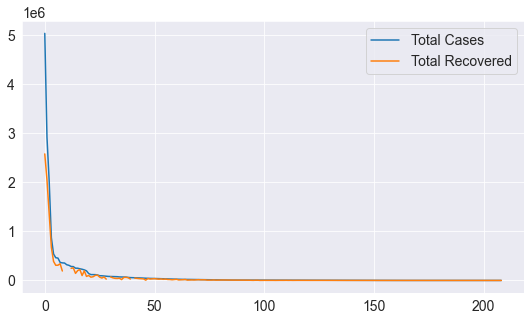

In [28]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (9,5)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

plt.plot(world_data_df.TotalCases)
plt.plot(world_data_df.TotalRecovered)
plt.legend(["Total Cases", "Total Recovered", "Total Tests"]);

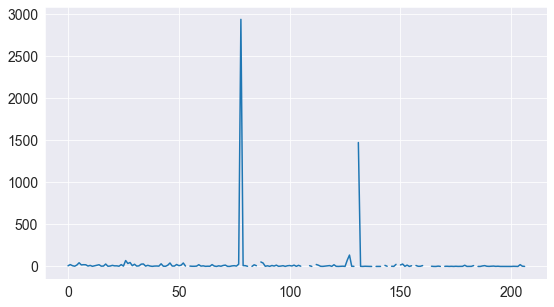

In [29]:
plt.plot(world_data_df1.Positivity_rate)

In [30]:
world_data_df1

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,Cases_per_Population,Recovered_per_Cases,Deaths_per_Cases,Positivity_rate
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,1.519386,0.777984,0.049156,7.969925
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,1.371610,0.962650,0.046375,22.092386
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,0.146626,0.099713,0.003014,9.144327
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,0.597429,0.463446,0.010008,2.934000
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,0.906315,0.652250,0.016173,17.086253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,1.0,10.0,2.0,0.0,2604.0,200.0,61.0,12220.0,0,0.260417,0.200321,0.020032,21.311475
205,Caribbean Netherlands,North America,2.624700e+04,13,0.0,7.0,6.0,0.0,495.0,0.0,424.0,16154.0,0,0.049529,0.026670,0.000000,3.066038
206,Falkland Islands,South America,3.489000e+03,13,0.0,13.0,0.0,0.0,3726.0,0.0,1816.0,520493.0,0,0.372600,0.372600,0.000000,0.715859
207,Vatican City,Europe,8.010000e+02,12,0.0,12.0,0.0,0.0,14981.0,0.0,0.0,0.0,Europe,1.498127,1.498127,0.000000,inf


In [31]:
top_cases_countries = world_data_df1.sort_values("TotalCases", ascending=False).head(10)
top_cases_countries

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,Cases_per_Population,Recovered_per_Cases,Deaths_per_Cases,Positivity_rate
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,1.519386,0.777984,0.049156,7.969925
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,1.371610,0.962650,0.046375,22.092386
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,0.146626,0.099713,0.003014,9.144327
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,0.597429,0.463446,0.010008,2.934000
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,0.906315,0.652250,0.016173,17.086253
5,Mexico,North America,1.290662e+08,462690,50517.0,308848.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas,0.358491,0.239294,0.039140,43.777409
6,Peru,South America,3.301632e+07,455409,20424.0,310337.0,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas,1.379345,0.939950,0.061860,18.264366
7,Chile,South America,1.913251e+07,366671,9889.0,340168.0,16614.0,1358.0,19165.0,517.0,1760615.0,92022.0,Americas,1.916481,1.777958,0.051687,20.826302
8,Colombia,South America,5.093626e+07,357710,11939.0,192355.0,153416.0,1493.0,7023.0,234.0,1801835.0,35374.0,Americas,0.702270,0.377639,0.023439,19.852539
9,Spain,Europe,4.675665e+07,354530,28500.0,0.0,0.0,617.0,7582.0,610.0,7064329.0,151087.0,Europe,0.758245,0.000000,0.060954,5.018594


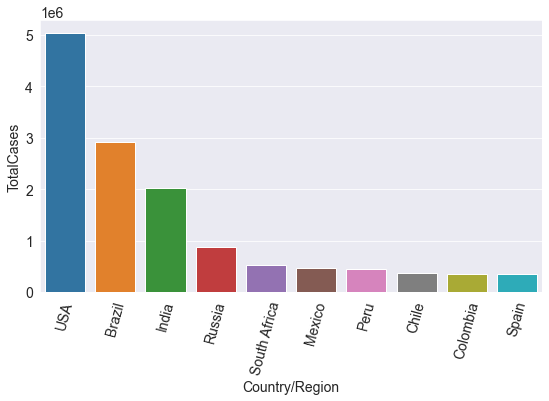

In [32]:
sns.barplot(x = top_cases_countries["Country/Region"],y = top_cases_countries.TotalCases)
plt.xticks(rotation = 75);

In [33]:
print(Continent_wise_cases)

WHO Region
Africa                    852026
Americas                10452852
EasternMediterranean     1605866
Europe                   3544086
South-EastAsia           2426899
WesternPacific            267114
Name: TotalCases, dtype: int64


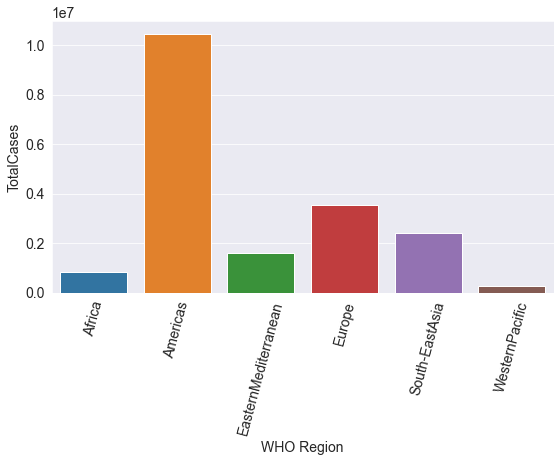

In [34]:
sns.barplot(x = Continent_wise_cases.index, y = Continent_wise_cases)
plt.xticks(rotation = 75);

In [35]:
world_data_df.groupby("WHO Region")["TotalCases"].count()

WHO Region
Africa                  47
Americas                35
EasternMediterranean    22
Europe                  55
South-EastAsia          10
WesternPacific          15
Name: TotalCases, dtype: int64

In [36]:
continent_wise_recovered

WHO Region
Africa                   604326.0
Americas                6259733.0
EasternMediterranean    1340094.0
Europe                  2047446.0
South-EastAsia          1621081.0
WesternPacific           182319.0
Name: TotalRecovered, dtype: float64

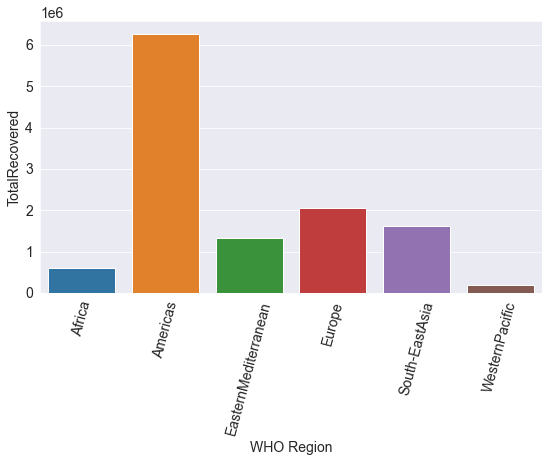

In [37]:
sns.barplot(x=continent_wise_recovered.index, y = continent_wise_recovered)
plt.xticks(rotation=75);

In [38]:
continent_wise_recovery_rates

WHO Region
Africa                  70.928117
Americas                59.885407
EasternMediterranean    83.449927
Europe                  57.770776
South-EastAsia          66.796393
WesternPacific          68.255127
dtype: float64

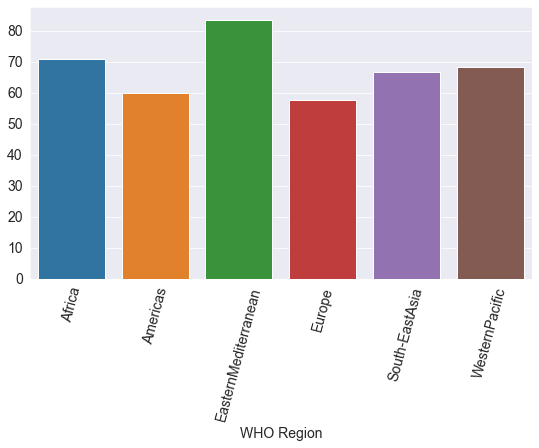

In [39]:
sns.barplot(x = continent_wise_recovery_rates.index, y = continent_wise_recovery_rates)
plt.xticks(rotation = 75);